# Lab 2: Дерево рішень та ліс дерев рішень

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Dataset #1: Emails

In [2]:
import re
from nltk.corpus import stopwords
import string

df = pd.DataFrame(pd.read_csv('Phishing_Email.csv')) # https://www.kaggle.com/datasets/subhajournal/phishingemails
df.dropna(inplace=True)
df.drop(columns=df.columns[0], inplace=True)
def process_text(transformer: str) -> str:
    transformer = transformer.lower()
    transformer = re.sub(r"https*\S+", " ", transformer)
    transformer = re.sub(r"^([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-]+)(\.[a-zA-Z]{2,5}){1,2}$", " ", transformer)
    transformer = re.sub("[%s]" % re.escape(string.punctuation), " ", transformer)
    transformer = re.sub(r"\s{2,}", " ", transformer)
    
    result = ' '.join([word for word in transformer.split(' ') if word not in stopwords.words("english")])
    return result.strip()

x = df.drop('Email Type', axis=1)['Email Text'].apply(process_text)
y = LabelEncoder().fit_transform(df['Email Type'])


x_train_email, x_test_email, y_train_email, y_test_email = train_test_split(x, y, test_size=0.2, random_state=0)

## Векторизація тексту за TF-IDF та Count Vectorizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(max_features=1000, ngram_range=(1, 2))
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

x_train_vectorised_tfidf = tfidf.fit_transform(x_train_email)
x_test_vectorised_tfidf = tfidf.transform(x_test_email)
x_train_vectorised_cv = cv.fit_transform(x_train_email)
x_test_vectorised_cv = cv.transform(x_test_email)

## Decision Tree and Random Forest

In [4]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=0, criterion='gini')
decision_tree.fit(x_train_vectorised_cv, y_train_email)

y_pred = decision_tree.predict(x_test_vectorised_cv)

print(f'Matrix:\n{confusion_matrix(y_test_email, y_pred)}\nClassification Report:\n{classification_report(y_test_email, y_pred)}\nAccuracy: {accuracy_score(y_test_email, y_pred)}')

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=5, random_state=0, criterion='gini', n_estimators=100)
random_forest.fit(x_train_vectorised_tfidf, y_train_email)

y_pred = random_forest.predict(x_test_vectorised_tfidf)

print(f'Matrix:\n{confusion_matrix(y_test_email, y_pred)}\nClassification Report:\n{classification_report(y_test_email, y_pred)}\nAccuracy: {accuracy_score(y_test_email, y_pred)}')

Matrix:
[[ 645  812]
 [  73 2197]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59      1457
           1       0.73      0.97      0.83      2270

    accuracy                           0.76      3727
   macro avg       0.81      0.71      0.71      3727
weighted avg       0.80      0.76      0.74      3727

Accuracy: 0.7625436007512745
Matrix:
[[ 786  671]
 [  19 2251]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.54      0.69      1457
           1       0.77      0.99      0.87      2270

    accuracy                           0.81      3727
   macro avg       0.87      0.77      0.78      3727
weighted avg       0.85      0.81      0.80      3727

Accuracy: 0.8148645022806547


## Dataset #2: Access behavior anomaly

In [15]:
from sklearn.preprocessing import StandardScaler

df_2 = pd.read_csv('supervised_dataset.csv') # https://www.kaggle.com/datasets/tangodelta/api-access-behaviour-anomaly-dataset?select=supervised_dataset.csv

df_2.drop(df_2.columns[0], inplace=True, axis=1)
df_2.drop('_id', inplace=True, axis=1)
df_2.drop('source', inplace=True, axis=1)
df_2.dropna(inplace=True)

le = LabelEncoder()
df_2['ip_type'] = le.fit_transform(df_2['ip_type'])
df_2['classification'] = le.fit_transform(df_2['classification'])
x = df_2.drop('classification', axis=1)
y = df_2['classification']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

## Decision Tree and Random Forest

In [16]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

decision_tree.fit(scaled_x_train, y_train)
y_pred = decision_tree.predict(scaled_x_test)

print(f'Matrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

random_forest.fit(scaled_x_train, y_train)
y_pred = random_forest.predict(scaled_x_test)

print(f'Matrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

Matrix:
[[218   0]
 [  0 121]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       121

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339

Accuracy: 1.0
1
Matrix:
[[218   0]
 [  0 121]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       121

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339

Accuracy: 1.0


## Візуалізація дерева ухвалення рішень

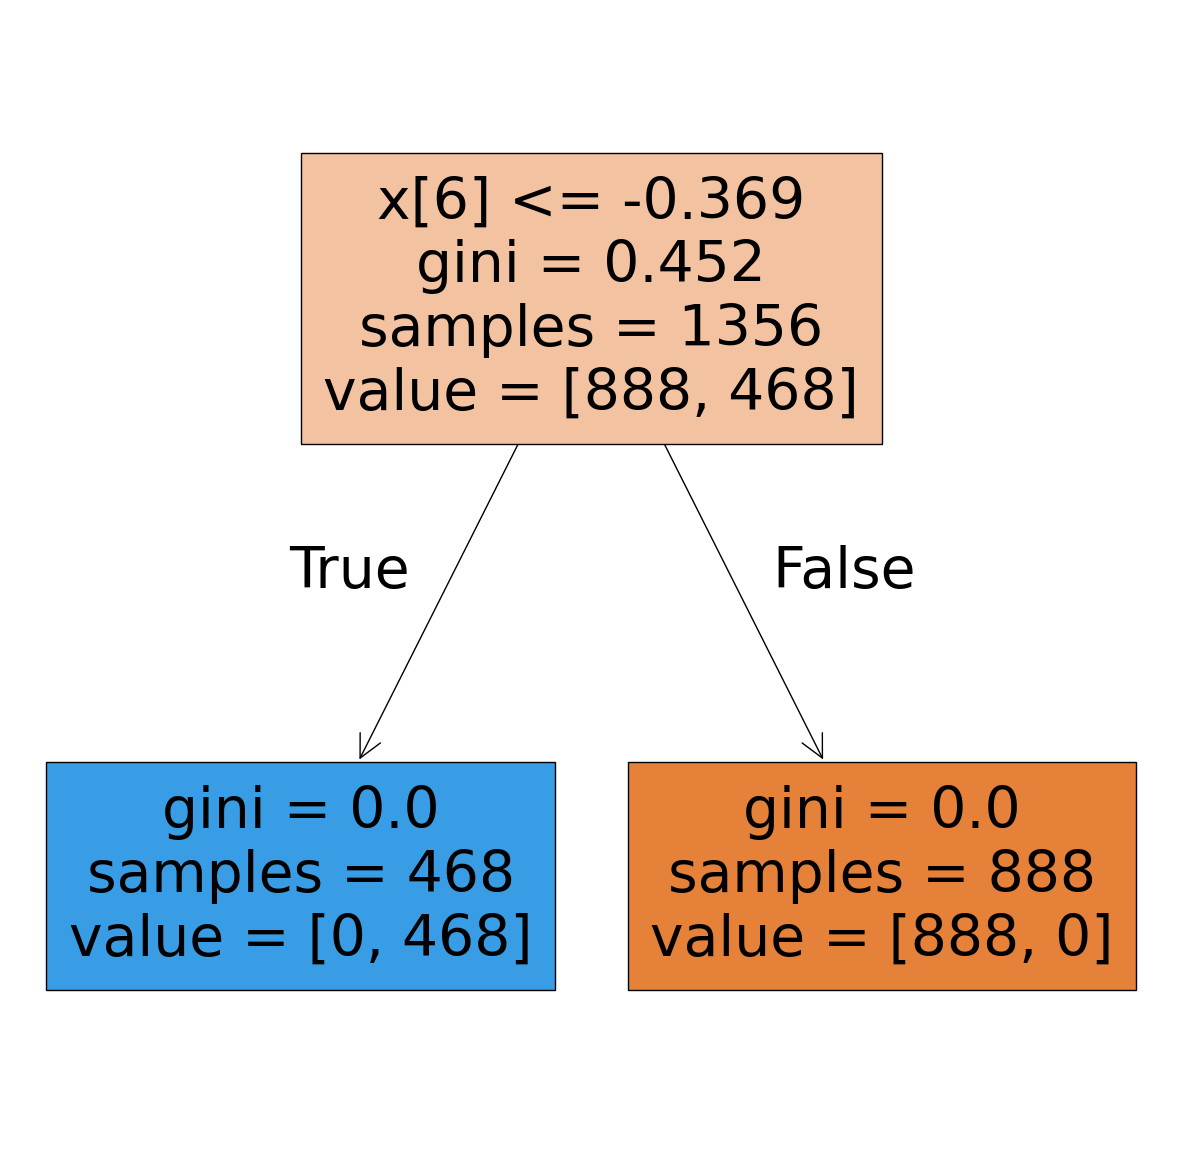

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize = (15, 15))
plot_tree(decision_tree, filled = True)
plt.show()

## Dataset #3: URL Phishing

In [11]:
df_3 = pd.read_csv('dataset_phishing.csv').drop('url', axis=1)

df_3['status'] = le.fit_transform(df_3['status'])

x = df_3.drop('status', axis=1)
y = df_3['status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

## Decision Tree and Random Forest

In [13]:
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=0, criterion='gini')
random_forest = RandomForestClassifier(max_depth=5, random_state=0, criterion='gini', n_estimators=100)

decision_tree.fit(scaled_x_train, y_train)
y_pred = decision_tree.predict(scaled_x_test)

print(f'Matrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

random_forest.fit(scaled_x_train, y_train)
y_pred = random_forest.predict(scaled_x_test)

print(f'Matrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

Matrix:
[[1082   73]
 [  82 1049]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1155
           1       0.93      0.93      0.93      1131

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286

Accuracy: 0.9321959755030621
Matrix:
[[1100   55]
 [  67 1064]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1155
           1       0.95      0.94      0.95      1131

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286

Accuracy: 0.9466316710411199
